<a href="https://colab.research.google.com/github/sangaer/PracticalMachineLearning2019/blob/master/week6/%5BLecture6%5DTreesAndEnsemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture 6 : Trees and Ensemble**
## Agenda
**Course**: Trees and ensemble with Binary Classifier
>* Decision Tree 
>  * **Theory:** Information Gain (entropy, Gini Impurity) 
>  * **Parameter:** Max Depth
>  * **Output:** predict probability
>  * **Analysis:** 
>    * Visualization
>    * Feature importance
>* Random Forest
>  * **Theory:** Bagging
>  * **Parameter:**
>    * Max Depth
>    * Number of trees
>    * Max Features
>* XGBoost
>  * **Theory:** Boosting
>    * Missing Value
>  * **Parameter:**
>    * Max Depth
>    * Number of trees
>    * learning rate
>* Stacking

**Takeaway**

**Exercise**
>* Regression: California Housing Price
>* Multiclass classifier: MNIST




# Load and check Iris dataset
---

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
%matplotlib inline

iris = datasets.load_iris()
print(iris.feature_names)
print(iris.target_names)
x = pd.DataFrame(data=iris['data'],columns=iris['feature_names']) 
y = pd.DataFrame(data=iris['target'],columns=['target'])
iris_data = pd.concat([x, y], axis=1)
print(iris_data.shape)
iris_data.head(5)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Only select 2 categories for binary classification

In [2]:
iris2_data = iris_data.query('target>0')
print(iris2_data.shape)

(100, 5)


### only select 2 features for easy visualization

In [3]:
iris2_data = iris2_data[['sepal length (cm)', 'petal length (cm)','target']]
print(iris2_data.shape)
iris2_data.describe()

(100, 3)


,sepal length (cm),petal length (cm),target
count,100.000000,100.000000,100.000000
mean,6.262000,4.906000,1.500000
std,0.662834,0.825578,0.502519
min,4.900000,3.000000,1.000000
25%,5.800000,4.375000,1.000000
50%,6.300000,4.900000,1.500000
75%,6.700000,5.525000,2.000000
max,7.900000,6.900000,2.000000


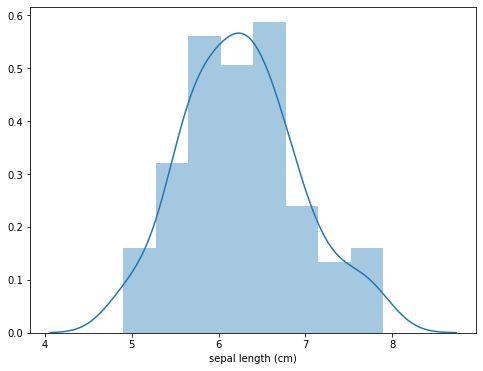

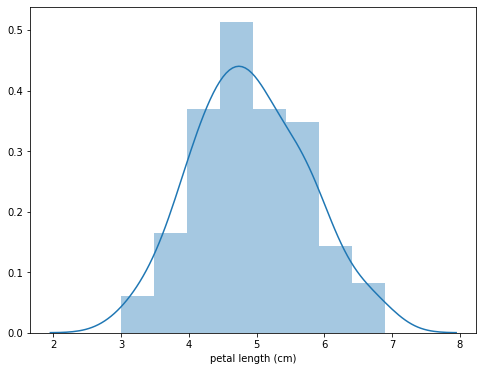

Text(0, 0.5, 'petal length (cm)')

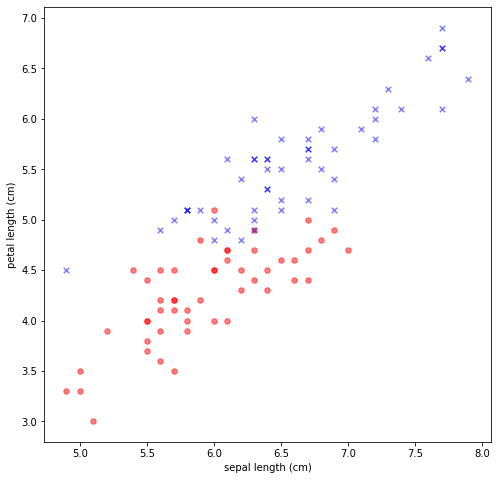

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8,6
sns.distplot(iris2_data['sepal length (cm)'])
plt.show()
sns.distplot(iris2_data['petal length (cm)'])
plt.show()
df0 = pd.DataFrame(data=iris2_data.loc[iris2_data['target']==1])
df1 = pd.DataFrame(data=iris2_data.loc[iris2_data['target']==2])
plt.figure(figsize=(8,8))
plt.scatter(df0['sepal length (cm)'], df0['petal length (cm)'], s=30, c='red',  marker='o', alpha=0.5, label='C1')
plt.scatter(df1['sepal length (cm)'], df1['petal length (cm)'], s=30, c='blue', marker='x', alpha=0.5, label='C2')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

### Take 70% data for training, 30％ for testing (fix the random state !!!)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    iris2_data[['sepal length (cm)', 'petal length (cm)']], iris2_data[['target']], test_size=0.3, random_state=0)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()-1
y_test = y_test.to_numpy()-1

# Tree base advantages
---
### If we need a baseline model
1. No need to do complex feature pre processing
1. No need to do feature selection
1. Can evaluate the feature importance
1. No need to tune parameters hardly
1. Can evaluate the problem complexity
1. Fast training speed
1. Stable accuracy for building the baseline




# 1. Decision Tree
---
### Find the best split to make the leaves be pure class

![alt text](https://www.researchgate.net/profile/Alaa_Elsayad/publication/236965938/figure/fig1/AS:393124452028421@1470739581362/Example-of-a-binary-decision-tree.png)

> ### Need to define an index for purity

* ### Information Gain
![alt text](https://drive.google.com/uc?id=1bXS2wuKxpNVeL_Y56TSb5co9rQxIXThn)
* ### Information (Entropy)
![alt text](https://drive.google.com/uc?id=1ZrB5iAuxSPmSlC8luzv24TxfQE_RXZOl)
![alt text](https://drive.google.com/uc?id=1u0fYOvJrSJv9ucGy1Q94Uy0pdq_LDgEZ)

* ### Example: 40 animals (20 dogs, 20 cats)
  * Entropy is 1
    * If we split it to Left(10 dogs, 10 cats) and Right(10 dogs, 10 cats)
      * Entropy = $\frac{20}{40}*1 + \frac{20}{40}*1 = 1$
      * IG = 1 - 1 = 0 
    * If we split it to Left(20 dogs) and Right(20 cats)
      * Entropy = $\frac{20}{40}*0 + \frac{20}{40}*0 = 0$
      * IG = 1 - 0 = 1 

* ## Regression Tree
  > ### Find the best split to minimize MSE

#### For other decision tree techiniques, you can search
> * Gini index
> * Tree Pruning

### Decision tree training and testing

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

#train
tree.fit(x_train, y_train)
train_score = tree.score(x_train, y_train)

#test
test_score = tree.score(x_test, y_test)
print('training accuracy:'+str(train_score))
print('testing accuracy:'+str(test_score))

training accuracy:0.9857142857142858
testing accuracy:0.9


[0.042857142857142816, 0.02857142857142858, 0.014285714285714235, 0.014285714285714235, 0.0, 0.0]
[0.1333333333333333, 0.16666666666666663, 0.09999999999999998, 0.1333333333333333, 0.1333333333333333, 0.1333333333333333]


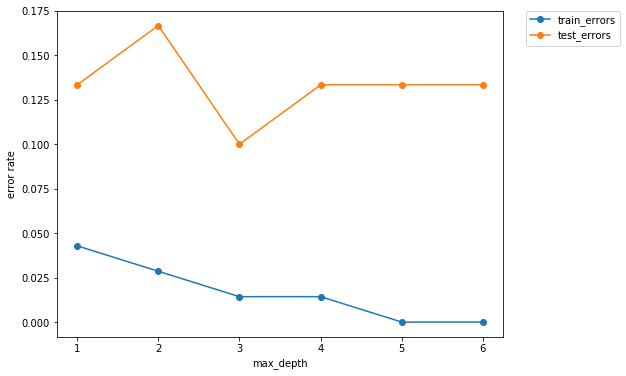

In [7]:
trees = []
train_errors = []
test_errors = []
max_depth = 6
for tree_id in range(1, max_depth+1):
    trees.append(DecisionTreeClassifier(criterion='entropy', max_depth=tree_id, random_state=0))
    trees[tree_id - 1].fit(x_train, y_train)
    train_errors.append(1 - trees[tree_id - 1].score(x_train, y_train))
    test_errors.append(1 - trees[tree_id - 1].score(x_test, y_test))
print(train_errors)
print(test_errors)
plt.plot(range(1, max_depth+1), train_errors, '-o', label="train_errors")
plt.plot(range(1, max_depth+1), test_errors, '-o', label="test_errors")
plt.xlabel('max_depth')
plt.ylabel('error rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

![alt text](https://drive.google.com/uc?id=1_nEDVnmCdPYDwkv-5KAlmthcF_gRiL2Y)

### Predict Prob
The predicted class probability is the fraction of samples of the same class in a leaf.



predict_proba[0:5]
[[0.05555556 0.94444444]
 [0.05555556 0.94444444]
 [0.05555556 0.94444444]
 [0.05555556 0.94444444]
 [0.05555556 0.94444444]]


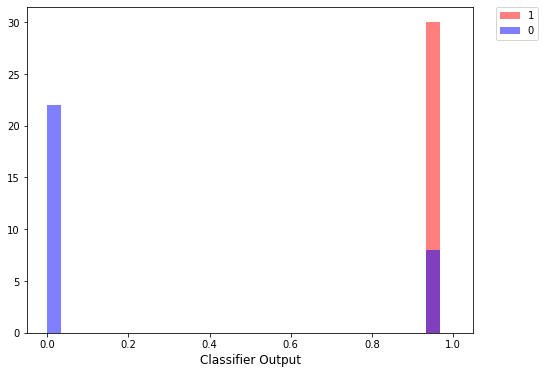

predict_proba[0:5]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


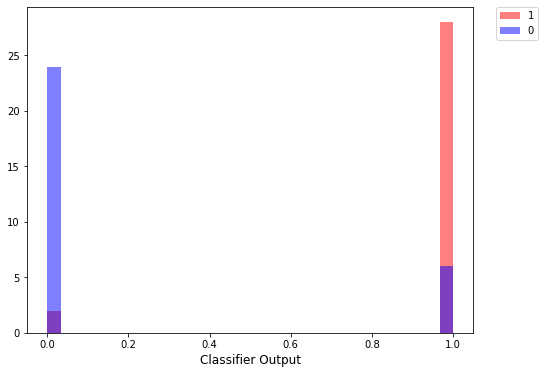

In [8]:
def prob_plot(y_test, test_proba, bins=30):
    test = pd.DataFrame(y_test, columns=["label"])
    print("predict_proba[0:5]")
    print(test_proba[0:5])
    test["probability"] = test_proba[:,1]
    test_neg = test.loc[test['label'] == 0]
    test_pos = test.loc[test['label'] == 1]

    plt.hist(test_pos["probability"],
    color='r', alpha=0.5, range=(0,1), bins=bins,
    histtype='stepfilled', density=True,
    label='1')
    
    plt.hist(test_neg["probability"],
    color='b', alpha=0.5, range=(0,1), bins=bins,
    histtype='stepfilled', density=True,
    label='0')

    plt.xlabel("Classifier Output", fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

prob_plot(y_test, trees[0].predict_proba(x_test))
plt.show()
prob_plot(y_test, trees[5].predict_proba(x_test))
plt.show()

### Visualize the result

In [0]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
   
        plt.scatter(x=X[(y == cl)[:, 0], 0], y=X[(y == cl)[:, 0], 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl)
    
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')                  

training: depth = 3


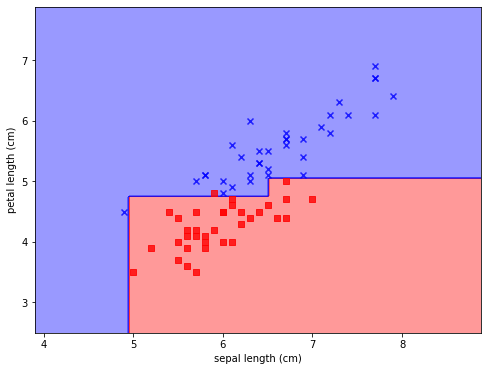

training: depth = 5


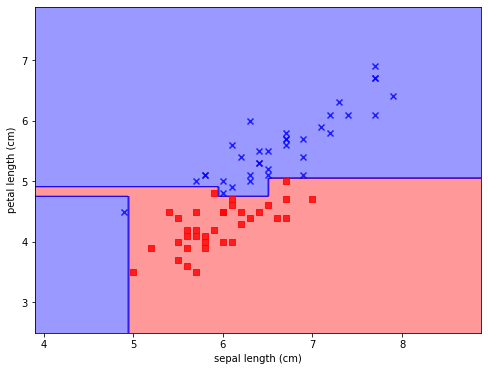

testing: depth = 5


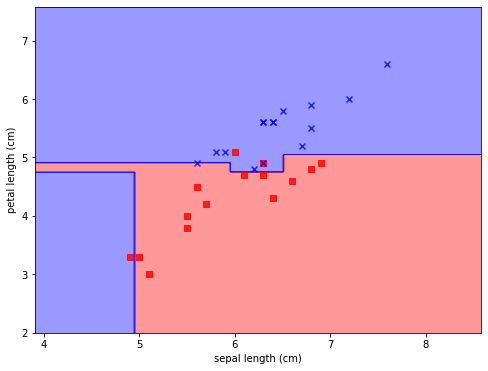

In [10]:
# depth = 3, training, fitting
print("training: depth = 3")
plot_decision_regions(x_train, y_train, classifier=trees[2])
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()
print("training: depth = 5")
# depth = 5, training, overfitting
plot_decision_regions(x_train, y_train, classifier=trees[4])
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()
print("testing: depth = 5")
# depth = 5, testing, overfitting
plot_decision_regions(x_test, y_test, classifier=trees[4])
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

[Text(223.2, 298.98, 'X[1] <= 4.75\nentropy = 1.0\nsamples = 70\nvalue = [35, 35]'),
 Text(111.6, 244.62, 'X[0] <= 4.95\nentropy = 0.191\nsamples = 34\nvalue = [33, 1]'),
 Text(55.8, 190.26000000000002, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(167.39999999999998, 190.26000000000002, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(334.79999999999995, 244.62, 'X[1] <= 5.05\nentropy = 0.31\nsamples = 36\nvalue = [2, 34]'),
 Text(279.0, 190.26000000000002, 'X[0] <= 6.5\nentropy = 0.863\nsamples = 7\nvalue = [2, 5]'),
 Text(223.2, 135.9, 'X[0] <= 5.95\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(167.39999999999998, 81.53999999999999, 'X[1] <= 4.9\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(111.6, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.2, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(279.0, 81.53999999999999, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(334.79999999999995, 135.9, 'en

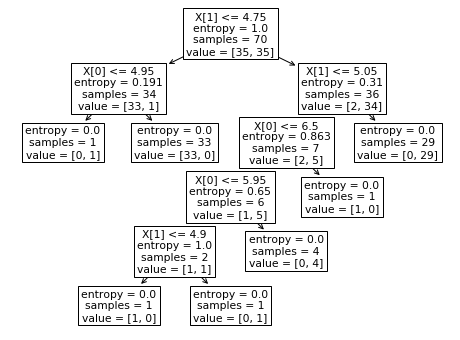

In [11]:
from sklearn import tree
tree.plot_tree(trees[4])

### Feature Importance
>The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.

In [12]:
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 15, 
                            iris2_data.columns[f], 
                            trees[4].feature_importances_[f]))

 1) sepal length (cm) 0.150722
 2) petal length (cm) 0.849278


### Overfitting Problem
* Low bias, high varience
* Average complex models to reduce variance
* ![alt text](https://drive.google.com/uc?id=1GHMmDonBeaSJ05vbrK1O6aq3ZlIJcHL9)

# 2. Random Forest (Bagging, **B**ootstrap **agg**regat**ing**)
---

### From single decision tree to random forest
* Random forest can be considered as an ensemble of decision trees.

![alt text](https://drive.google.com/uc?id=1311nLuNVUVzJQsKfyFb59gf6DECw4kye)

* Steps
1. Randomly draw M samples from the training set with replacement;
2. Grow a decision tree from the bootstrap samples. At each node:
Randomly select  K  features without replacement;
3. Split the node by finding the best cut among the selected features that maximizes the information gain;
4. Repeat the steps 1 to 2  T  times to get  T  trees;
5. Aggregate the predictions made by different trees via the majority vote.
  * T trees: n_estimators
  * K features: max_features, default=sqrt(n_features)

* Bootstrap aggregating
> Given a standard training set D of size n, bagging generates m new training sets Di, each of size n′, by sampling from D uniformly and with replacement.

  * If n′=n, this kind of sample is known as a bootstrap sample.
    * Original Sample : [1,2,3,4,5]
    * Boostrap 1 : [1,2,4,4,1]
    * Bootstrap 2: [1,1,3,3,5]

  * Can be parallel



[0.02857142857142858, 0.014285714285714235, 0.014285714285714235, 0.014285714285714235, 0.014285714285714235]
[0.1333333333333333, 0.09999999999999998, 0.1333333333333333, 0.09999999999999998, 0.09999999999999998]


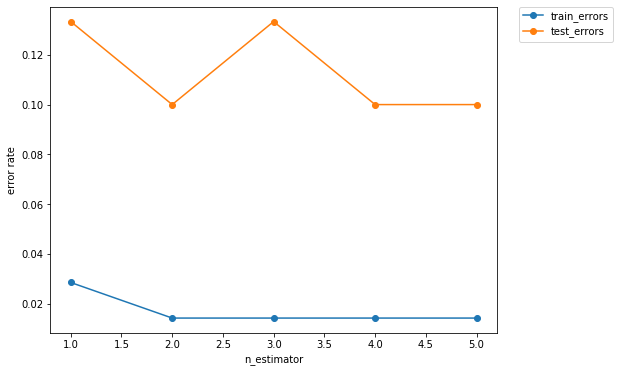

In [13]:
from sklearn.ensemble import RandomForestClassifier
forests = []
train_errors = []
test_errors = []
max_depth = 5
max_estimator = 5

for forest_id in range(1, max_estimator+1):
    forests.append(RandomForestClassifier(
        criterion='entropy', max_depth=max_depth, random_state=0, n_estimators=forest_id))
    forests[forest_id - 1].fit(x_train, y_train.ravel())
    train_errors.append(1 - forests[forest_id - 1].score(x_train, y_train))
    test_errors.append(1 - forests[forest_id - 1].score(x_test, y_test))
print(train_errors)
print(test_errors)
plt.plot(range(1, max_estimator+1), train_errors, '-o', label="train_errors")
plt.plot(range(1, max_estimator+1), test_errors, '-o', label="test_errors")
plt.xlabel('n_estimator')
plt.ylabel('error rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### Predict Probability

predict_proba[0:5]
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


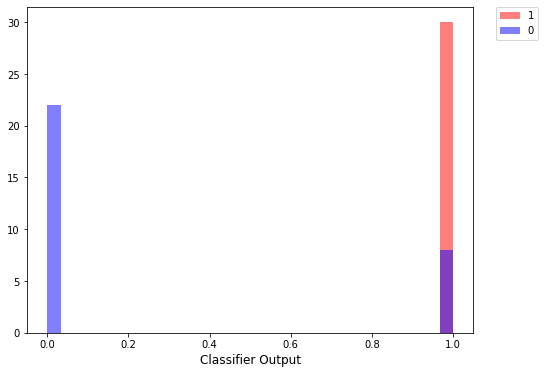

predict_proba[0:5]
[[0.6 0.4]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]]


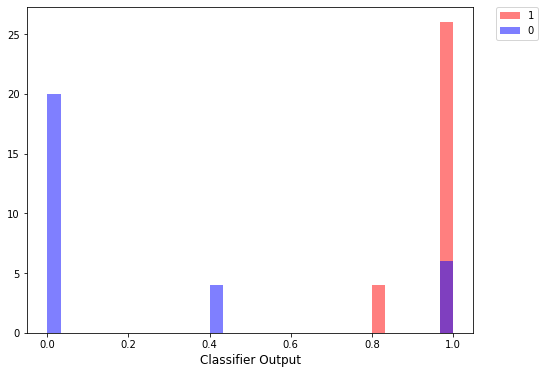

In [14]:
prob_plot(y_test, forests[0].predict_proba(x_test))
plt.show()
prob_plot(y_test, forests[4].predict_proba(x_test))
plt.show()

### Visualize the result

training: 5 trees


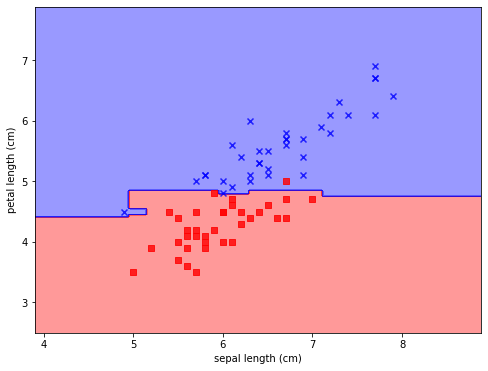

testing: 5 trees


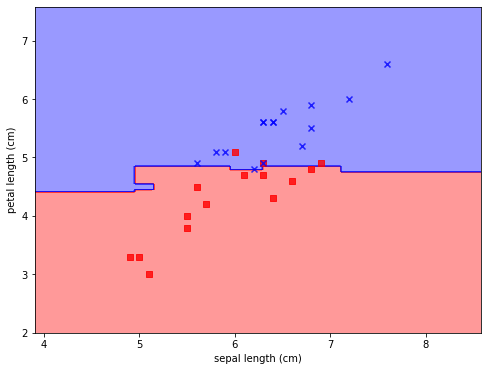

In [15]:
print("training: 5 trees")
plot_decision_regions(x_train, y_train, classifier=forests[4])
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()
print("testing: 5 trees")
plot_decision_regions(x_test, y_test, classifier=forests[4])
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

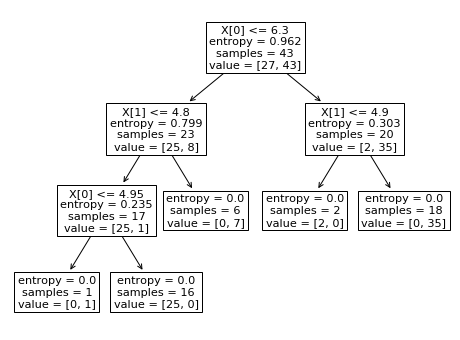

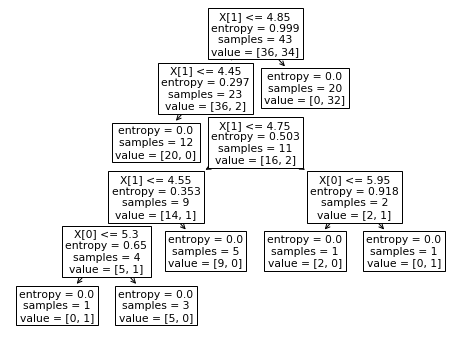

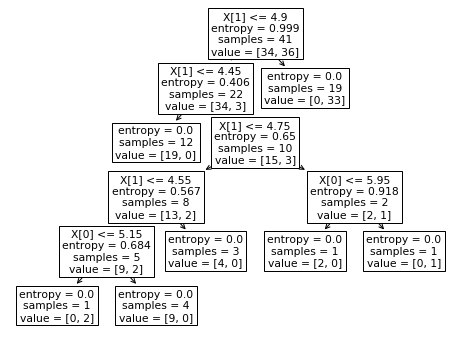

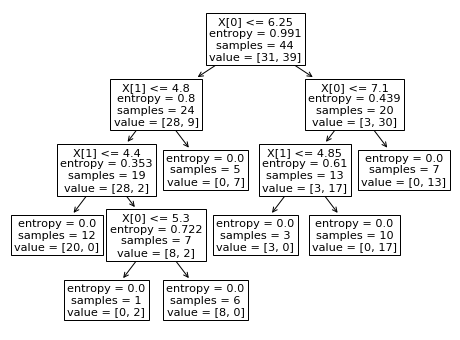

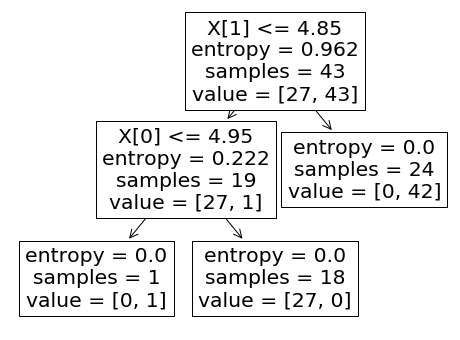

In [16]:
from sklearn import tree
for tree_in_forest in forests[4].estimators_:
    tree.plot_tree(tree_in_forest)
    plt.show()

### Feature Importance

In [17]:
# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 15, 
                            iris2_data.columns[f], 
                            forests[4].feature_importances_[f]))

 1) sepal length (cm) 0.273628
 2) petal length (cm) 0.726372


# 3. XGBoost (Boosting)
---
![alt text](https://drive.google.com/uc?id=1BLxN-1aqzV1YjOgKmS0T6O0AeiA6UZZM)
![alt text](https://drive.google.com/uc?id=1CLMhZ3UzFLnUfovN9P1VbPVH8294xizd)

## Adaboost 
>* ## Reweight the training data to make previous classifier 50% error rate.
>  ![alt text](https://drive.google.com/uc?id=1uH7pD6erXk59uQFJQ5W66QndoJH6AnHI)
>
>* ## Toy example
>  * ### Step1
![alt text](https://drive.google.com/uc?id=11g2iTb6I3eYbTxv_9xj_8FT9j6JatIlP)
>  * ### Step2
![alt text](https://drive.google.com/uc?id=148UUEY4N-5ueXWgV0uUHdL9WKE6Ymf26)
>  * ### Step3
![alt text](https://drive.google.com/uc?id=1oV1heiWD0_MuhAjvZttwS-khmzt1xTmN)
>  * ### Final
![alt text](https://drive.google.com/uc?id=1idih2lFqNtV_ABLy7pZDiaxdyb68DBrM)
## Gradient Boosting 
>* ### Step1:
>  * Training a weak regression tree f1, get the predict result f1(x) and residual h1=y-f1(x)
>* ### Step2: 
>  * Training a weak regression tree f2 to predict the residual h1, get the residual h2=y-f1(x)-f2(x)
>* ### Step3: 
>  * Training a weak regression tree f3 to predict the residual h2, get the residual h3=y-f1(x)-f2(x)-f3(x)
>* ### Step4: 
>  * Repeat many times
>* ### Final: 
>  * Final result = f1(x) + f2(x) + f3(x) + .... + fn(x)



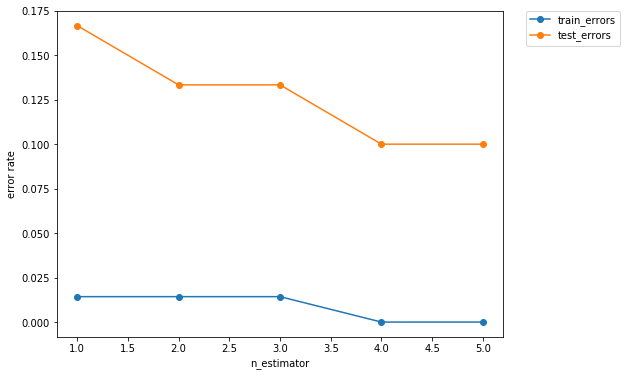

In [18]:
from xgboost.sklearn import XGBClassifier
xgbs = []
train_errors = []
test_errors = []
max_depth = 5
max_estimator = 5
learning_rate = 1
min_child_weight = 0 # force fitting training

model = XGBClassifier(min_child_weight=min_child_weight, learning_rate=learning_rate, max_depth=max_depth, random_state=0, n_estimators=max_estimator)
model.fit(x_train, y_train.ravel(), eval_set=[(x_train, y_train.ravel()), (x_test, y_test.ravel())], eval_metric='error', verbose=False)

results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# plot learning curve
fig, ax = plt.subplots()
ax.plot(range(1, max_estimator+1), results['validation_0']['error'], '-o', label='train_errors')
ax.plot(range(1, max_estimator+1), results['validation_1']['error'], '-o', label='test_errors')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('n_estimator')
plt.ylabel('error rate')
plt.show()

### Predict Probability

predict_proba[0:5]
[[0.40131235 0.59868765]
 [0.15653872 0.8434613 ]
 [0.15653872 0.8434613 ]
 [0.15653872 0.8434613 ]
 [0.15653872 0.8434613 ]]


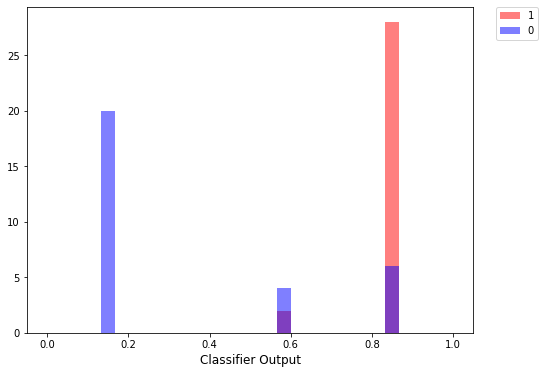

predict_proba[0:5]
[[0.8569514  0.1430486 ]
 [0.01312351 0.9868765 ]
 [0.6238651  0.3761349 ]
 [0.01635182 0.9836482 ]
 [0.01635182 0.9836482 ]]


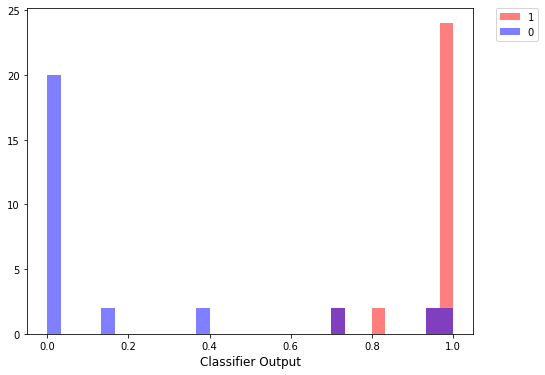

In [19]:
prob_plot(y_test, model.predict_proba(x_test, ntree_limit=1))
plt.show()
prob_plot(y_test, model.predict_proba(x_test, ntree_limit=5))
plt.show()

### Visualize the result

training: 5 trees


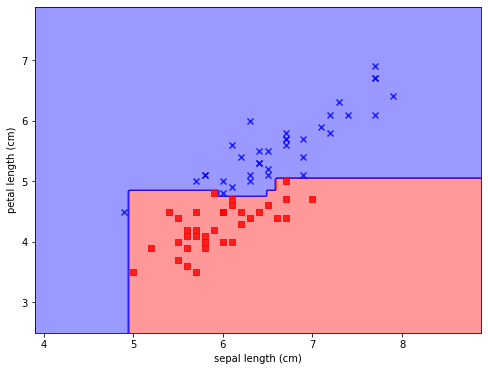

testing: 5 trees


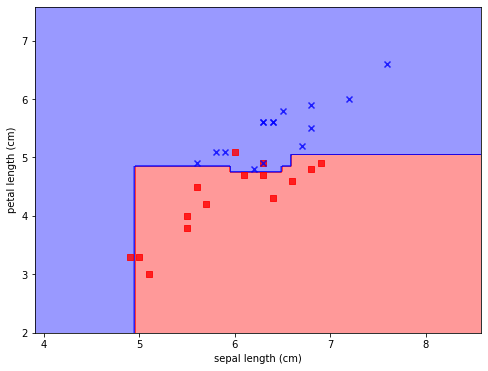

In [20]:
print("training: 5 trees")
plot_decision_regions(x_train, y_train, classifier=model)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()
print("testing: 5 trees")
plot_decision_regions(x_test, y_test, classifier=model)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

### Missing value

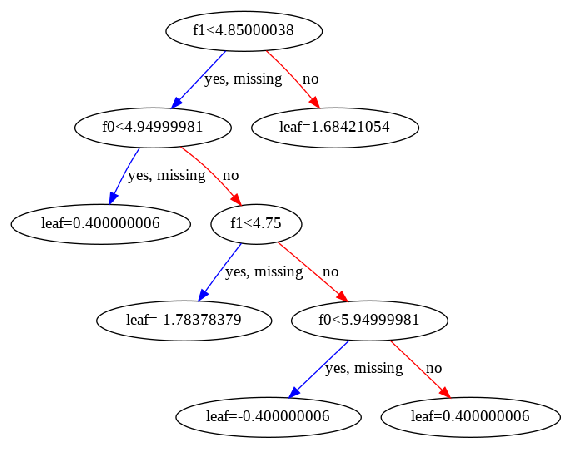

In [21]:
from xgboost import plot_tree
rcParams['figure.figsize'] = 16,8
plot_tree(model, num_trees=0)
plt.show()
rcParams['figure.figsize'] = 8,6

### Feature Importance
”weight” is the number of times a feature appears in a tree

”gain” is the average gain of splits which use the feature

”cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split

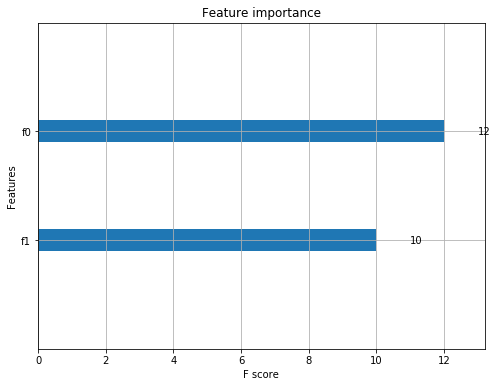

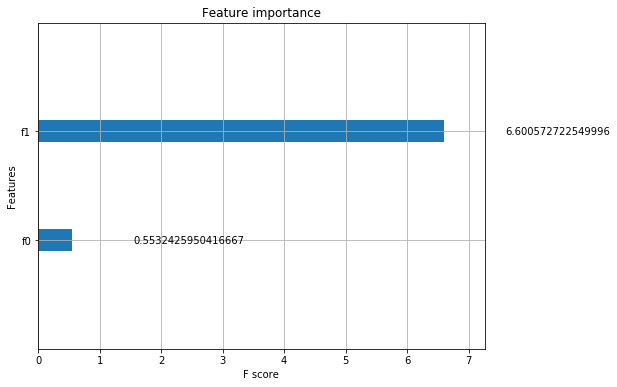

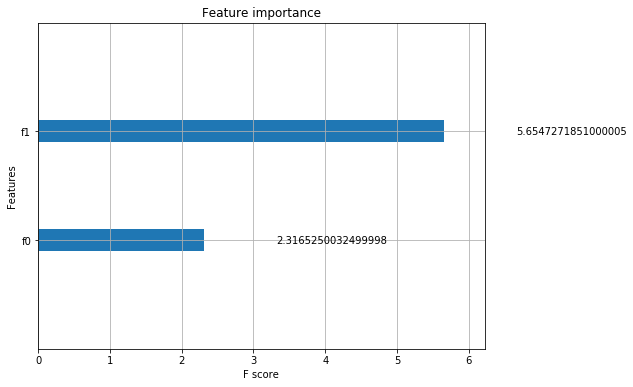

In [22]:
from xgboost import plot_importance
plot_importance(model, importance_type='weight')
plt.show()
plot_importance(model, importance_type='gain')
plt.show()
plot_importance(model, importance_type='cover')
plt.show()


#### Other techiniques
> * Feature importance: SHAP
>    * Consistent Individualized Feature Attribution for Tree
Ensembles https://arxiv.org/abs/1802.03888
> * Parameter search: Hyperopt
>    * https://github.com/hyperopt/hyperopt
> * LightGBM
>    * https://lightgbm.readthedocs.io/en/latest/

# Stacking
---
![alt text](https://drive.google.com/uc?id=1F4qRBIGc-aN0TiUUhRZmMeK3MYB2Choy)

# Takeaway
---
#### 1. Trees are good for baseline model.
- Good for column base heterogeneous features
- No need for feature normalization and selection
- Only few simple major parameters
- Fast and stable

#### 2. Try to fit in training data then do regulization to prevent overfitting.
- Deep learning is hard to fit in training data.
- Ensemble trees are easy to fit in training data and not easy to be overfitting.
- In many cases, boosting trees can have same level test error but less training error.

#### 3. Use Case
- Bagging is for providing probability (Strong, parallel)
- Boosting is necessary for production (Weak, sequencial)
- Stacking is necessary for competition

#### 4. We have tools for analysis the prediction rasult but still not easy for explaination.

# Excercise
---

## Regression: California Housing Price
- Trees cannot only be binary classifier, it can also be regressor.
- By this exercise, you can try to use XGBRegressor to pridict California Housing Price.
- Compare with the complicated neural network settings, you only need to set few XGBoost parameters to get better result.




In [0]:
df_train = pd.read_csv('sample_data/california_housing_train.csv').sample(frac=1, random_state=0).reset_index(drop=True)
df_test = pd.read_csv('sample_data/california_housing_test.csv')

from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred): 
    assert  len(list(filter(lambda x: x!=1, y_true.shape)))==1
    assert  len(list(filter(lambda x: x!=1, y_pred.shape)))==1
    y_true = y_true.reshape(-1)
    y_pred = y_pred.reshape(-1)
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_percentage_error(y_true, y_pred):
    assert  len(list(filter(lambda x: x!=1, y_true.shape)))==1
    assert  len(list(filter(lambda x: x!=1, y_pred.shape)))==1
    y_true = y_true.reshape(-1)
    y_pred = y_pred.reshape(-1)
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred) / y_true) * 100

### Neural Network
> Techiniques: Normalization, SGD, Dropout, Early stop

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 15300 samples, validate on 1700 samples
Epoch 1/100
15300/15300 - 10s - loss: 0.5934 - val_loss: 0.4600
Epoch 2/100
15300/15300 - 1s - loss: 0.5053 - val_loss: 0.4361
Epoch 3/100
15300/15300 - 1s - loss: 0.4765 - val_loss: 0.4144
Epoch 4/100
15300/15300 - 1s - loss: 0.4584 - val_loss: 0.3995
Epoch 5/100
15300/15300 - 1s - loss: 0.4472 - val_loss: 0.3932
Epoch 6/100
15300/15300 - 1s - loss: 0.4363 - val_loss: 0.3836
Epoch 7/100
15300/15300 - 1s - loss: 0.4274 - val_loss: 0.3794
Epoch 8/100
15300/15300 - 1s - loss: 0.4211 - val_loss: 0.3723
Epoch 9/100
15300/15300 - 1s - loss: 0.4174 - val_loss: 0.3709
Epoch 10/100
15300/15300 - 1s - loss: 0.4133 - val_loss: 0.3696
Epoch 11/100
15300/15300 - 1s - loss: 0.4079 - val_loss: 0.3624
Epoch 12/100
15300/15300 - 1s - loss: 0.4080 - val_loss: 0.3632
Epoch 13/100
15300/15300 - 1s - loss: 0.4027 - val_loss: 0.3562
Epoch 14/100
15300/15300 - 1s - loss: 0.4011 -

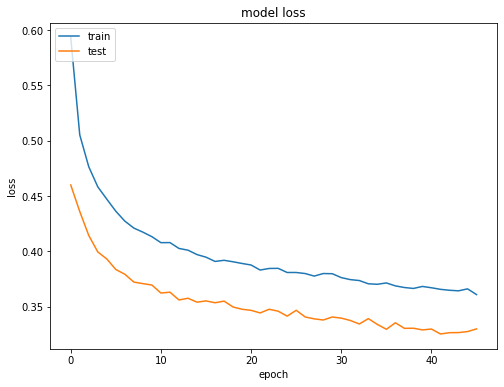

In [24]:
from sklearn.preprocessing import StandardScaler

x = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

val_ratio = 0.1
val_splitter = int(x.shape[0] * (1-val_ratio))

normalizer = StandardScaler()
y_normalizer = StandardScaler()
x_train = normalizer.fit_transform(x[:val_splitter])
y_train = y_normalizer.fit_transform(y[:val_splitter].reshape(-1, 1)).reshape(-1)
x_val = normalizer.transform(x[val_splitter:])
y_val = y_normalizer.transform(y[val_splitter:].reshape(-1, 1)).reshape(-1)
x_test = normalizer.transform(df_test.iloc[:, :-1])
y_test = y_normalizer.transform(df_test.iloc[:, -1].values.reshape(-1, 1)).reshape(-1)

import tensorflow as tf
N_Epoch = 100
BATCH_SIZE = 32
DROP_RATE = 0.3
EARLY_STOP_IF_N_EPOCHS_NOT_IMPROVE = 3
LEARNING_RATE = 0.01

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(x_train.shape[1], ), activation='relu'),
    tf.keras.layers.Dropout(DROP_RATE),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(DROP_RATE),
    tf.keras.layers.Dense(1, activation='linear')
])
optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)
loss = tf.keras.losses.MAE
model.compile(optimizer=optimizer,
              loss=loss)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=EARLY_STOP_IF_N_EPOCHS_NOT_IMPROVE+1, min_delta=1e-20)
history = model.fit(x_train, y_train, epochs=N_Epoch, verbose=2, validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=[callback])

print("Training Error:")
y_train_predict = y_normalizer.inverse_transform(model.predict(x_train))
y_train_ = y_normalizer.inverse_transform(y_train)
for metrix in [mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_percentage_error]:
    print('{}: {}'.format(metrix.__name__, metrix(y_train_, y_train_predict)))

print("Testing Error:")
y_test_predict = y_normalizer.inverse_transform(model.predict(x_test))
y_test_ = y_normalizer.inverse_transform(y_test)
for metrix in [mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_percentage_error]:
    print('{}: {}'.format(metrix.__name__, metrix(y_test_, y_test_predict)))

print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### XGBoost
>#### **Your task:** Construct the model of XGBRegressor
**Expect result:** 
* Default 
  * training mean_absolute_error should be less than 37000
  * testing mean_absolute_error should be less than 39000
* After fine tuned
  * training mean_absolute_error should be less than 15000
  * testing mean_absolute_error should be less than 32000

In [25]:
x = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

val_ratio = 0.1
val_splitter = int(x.shape[0] * (1-val_ratio))

x_train = x[:val_splitter]
y_train = y[:val_splitter]

x_val = x[val_splitter:]
y_val = y[val_splitter:]
x_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1].values

from xgboost.sklearn import XGBRegressor
model =  # Finish your task here

model.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_val, y_val)], eval_metric='mae')

print("Training Error:")
y_train_predict = model.predict(x_train)
for metrix in [mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_percentage_error]:
    print('{}: {}'.format(metrix.__name__, metrix(y_train, y_train_predict)))

print("Testing Error:")
y_test_predict = model.predict(x_test)
for metrix in [mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_percentage_error]:
    print('{}: {}'.format(metrix.__name__, metrix(y_test, y_test_predict)))

results = model.evals_result()
print(results)
epochs = len(results['validation_0']['mae'])
x_axis = range(0, epochs)
# plot learning curve
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()
plt.xlabel('n_estimator')
plt.ylabel('mae')
plt.show()

SyntaxError: ignored

**Quiz: Will add validation set back to train a new model can get better test result?**

## MultiClass: MNIST
- Trees can support multiclass classifier 
- XGBoost support multiclass by set **objective='multi:softmax'**, however, the training time is long.
- For image related problem, CNN can still get the better reesult.



In [0]:
from sklearn.metrics import accuracy_score

df_train = pd.read_csv('sample_data/mnist_train_small.csv').sample(frac=1, random_state=0).reset_index(drop=True)
df_test = pd.read_csv('sample_data/mnist_test.csv')

x = df_train.iloc[:, 1:].values/256
y = df_train.iloc[:, 0].values

val_ratio = 0.1
val_splitter = int(x.shape[0] * (1-val_ratio))

### Convolutional Neural Network

In [0]:

x_train = x[:val_splitter].reshape(len(x[:val_splitter]),28,28,1)
y_train = y[:val_splitter]
x_val = x[val_splitter:].reshape(len(x[val_splitter:]),28,28,1)
y_val = y[val_splitter:]

x_test = df_test.iloc[:, 1:].values/256
x_test = x_test.reshape(len(x_test),28,28,1)
y_test = df_test.iloc[:, 0].values

In [0]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(lr=1e-4)
loss = tf.keras.losses.sparse_categorical_crossentropy

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=60, validation_data=(x_val, y_val), batch_size=64, shuffle=True)

y_predict = (model.predict(x_test))
print('Test accuracy: %f' % accuracy_score(np.argmax(y_predict, axis=-1), y_test))


### Random Forest
> **Your task:** Construct the model of multiclass RandomForestClassifier

In [0]:
x_train = x[:val_splitter]
y_train = y[:val_splitter]
x_val = x[val_splitter:]
y_val = y[val_splitter:]

x_test = df_test.iloc[:, 1:].values/256
y_test = df_test.iloc[:, 0].values

model =  # Finish your task here

model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print('Test accuracy: %f' % accuracy_score(y_predict, y_test))

**Once finished, please Submit Your Colab Notebook [Here](https://forms.gle/CPCjA2kqx38htdz86)**

# Reference
---
* **LIB:** sklearn.tree.DecisionTreeClassifier
  * https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* **LIB:**sklearn.ensemble.RandomForestClassifier
  * https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* **LIB:** XGBoost
  * https://xgboost.readthedocs.io/en/latest/
* **LIB:** LightGBM
  * https://lightgbm.readthedocs.io/en/latest/
* **LIB:** Hyperopt: Distributed Hyperparameter Optimization
  * https://github.com/hyperopt/hyperopt
* **POST:**Decision Trees & Random Forests
  * http://www.cs.nthu.edu.tw/~shwu/courses/ml/labs/03_Decision-Trees_Random-Forest/03_Decision-Tree_Random-Forest.html
* **POST:** From a Single Decision Tree to a Random Forest
  * https://towardsdatascience.com/from-a-single-decision-tree-to-a-random-forest-b9523be65147
* **POST:** Introduction to Boosted Trees
  * https://homes.cs.washington.edu/~tqchen/pdf/BoostedTree.pdf
* **PAPER:** Consistent Individualized Feature Attribution for Tree Ensembles
  * https://arxiv.org/abs/1802.03888
* **VIDEO:** ML Lecture 22: Ensemble
  * https://youtu.be/tH9FH1DH5n0?list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49
